# 0 - Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2 - Load + Inspect Data
The above code created a dataset using NumPy. Now we will load the dataset from a .csv file called 'RoomT60s.csv'

In [2]:
df = pd.read_csv("RoomT60s.csv")
display(df.head())
print(df.columns)
print("Rows:", len(df))

,Room Name,Length,Width,Height,a,Volume,T60s
0,small-Room001,8.33,9.15,2.38,0.75,181.402410,0.159187
1,small-Room002,1.01,2.70,2.43,0.36,6.626610,0.103687
2,small-Room003,4.83,3.70,2.82,0.59,50.396220,0.141937
3,small-Room004,2.99,3.53,4.33,0.45,45.701851,0.152062
4,small-Room005,7.94,9.17,3.05,0.43,222.069890,0.337687


Index(['Room Name', 'Length', 'Width', 'Height', 'a', 'Volume', 'T60s'], dtype='str')
Rows: 600


We can extract the 'features' and 'labels' from the above pandas Dataframe.

In [58]:
x1_series = df["Volume"]    # (N)
x2_series = df["a"]
y_series = df["T60s"]      # (N,)

x_1 = x1_series.values        # (N)
x_2 = x2_series.values
y = y_series.values        # (N,)



## Matrix

This also includes broadcasting

In [ ]:
# Find the ranges of the inout and output
x1_range = max(x_1) - min(x_1)
x2_range = max(x_2) - min(x_2)
y_range = max(y) - min(y)

iterations = 1000    # TODO (e.g. 200 or 500)
iter_array = np.linspace(1,iterations,iterations)

# Hyperparameters
alpha_theta1 = 1/(2500*x1_range)       # TODO (e.g. 0.000000001)
alpha_theta2 = 1/(2500*x2_range)       # TODO (e.g. 0.000000001)
alpha_theta0 = 1/(500*y_range)

# Initial parameters
theta_0, theta_1, theta_2 = 0.5, 0, 0   # TODO

y_m = np.array(y)

x_0 = np.ones(len(x_1))
x_1 = np.array(x_1)
x_2 = np.array(x_2)
x_m = np.vstack([x_0,x_1,x_2]).T

p_vec = np.array([theta_0, theta_1, theta_2])  # shape (2,)


loss_history = np.zeros(iterations)
p_vec_history = np.zeros([np.size(p_vec),iterations])


# Iterate
for it in range(iterations):

    # 1) Forward pass (predictions)
    y_hat = x_m @ p_vec

    # 2) Calculate Loss
    loss = np.mean((y_m - y_hat)**2) 
    loss_history[it] = loss

    # 3) Record parameters
    p_vec_history[:,it]  = p_vec.flatten()

    # Calculate the gradient
    dL_dtheta1 = np.mean(-2 * (y_m - y_hat) * x_m[:,1])
    dL_dtheta2 = np.mean(-2 * (y_m - y_hat) * x_m[:,2])
    dL_dtheta0 = np.mean(-2 * (y_m -y_hat))

    # 5) Parameter update (gradient descent step)
    p_vec -= np.array([alpha_theta0*dL_dtheta0, alpha_theta1*dL_dtheta1, alpha_theta2*dL_dtheta2])

    # 6) Optional debug printing
    if it % 50 == 0:
        print(f"Iteration: {it}")
        print(f"Current m is {p_vec[1]}")
        print(f"Current dl_dtheta1 is {dL_dtheta1}")
        print(f"Current dl_dtheta0 is {dL_dtheta0}")
        print(f"Current dl_dtheta2 is {dL_dtheta2}")
        print(f"Current c is {p_vec[0]}")
        print(f"Current loss is {loss}")

print("Final parameters:", p_vec[0], p_vec[1],p_vec[2])
print("Final loss:", loss_history[-1])



Iteration: 0
Current m is 0.0001999565458927762
Current dl_dtheta1 is -5402.160802553781
Current dl_dtheta0 is -0.8337450000000001
Current dl_dtheta2 is -0.37397462083333344
Current c is 0.5006535812449474
Current loss is 0.6765485875390624
Iteration: 50
Current m is 0.00021548196075625245
Current dl_dtheta1 is -0.9376036444907064
Current dl_dtheta0 is 0.1809949565374553
Current dl_dtheta2 is 0.12490006156608584
Current c is 0.4934176916253964
Current loss is 0.09709461391944404
Iteration: 100
Current m is 0.0002171711897955228
Current dl_dtheta1 is -0.8892813786944074
Current dl_dtheta0 is 0.17117995750614018
Current dl_dtheta2 is 0.1196263585149292
Current c is 0.48652139326815236
Current loss is 0.0953789652287219
Iteration: 150
Current m is 0.00021877335173298254
Current dl_dtheta1 is -0.8434416438820517
Current dl_dtheta0 is 0.161869976024905
Current dl_dtheta2 is 0.11462173217423142
Current c is 0.4799996167144797
Current loss is 0.09383294351574045
Iteration: 200
Current m is 0.

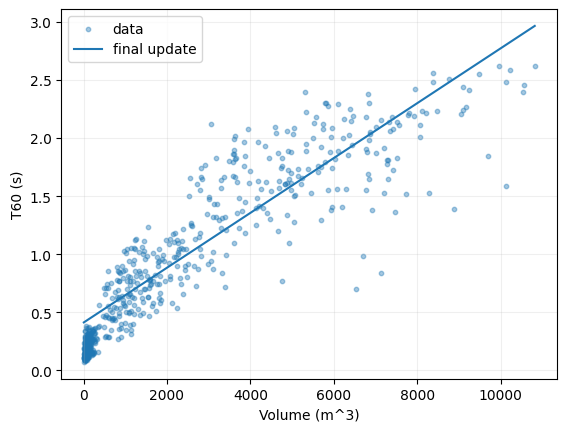

In [61]:
# plt.plot(iter_array,loss_history)

plt.scatter(x, y, s=10, alpha=0.4, label="data")

xx = np.linspace(x.min(), x.max(), 200)
plt.plot(xx, p_vec[1]*xx + p_vec[0], label="final update")

plt.xlabel("Volume (m^3)")
plt.ylabel("T60 (s)")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

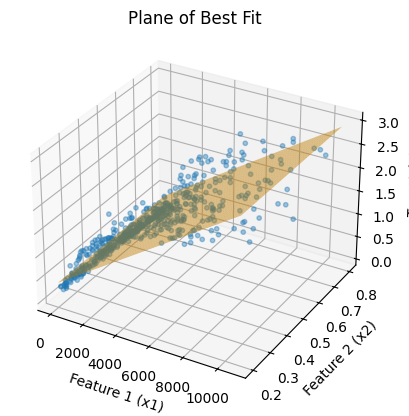

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting
import numpy as np

# Create figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter the original data
ax.scatter(x_1, x_2, y, s=10, alpha=0.4, label="data")

# Create a meshgrid for the plane
xx1 = np.linspace(x_1.min(), x_1.max(), 50)
xx2 = np.linspace(x_2.min(), x_2.max(), 50)
X1, X2 = np.meshgrid(xx1, xx2)

# Predicted y values on the grid
Y_hat = p_vec[0] + p_vec[1]*X1 + p_vec[2]*X2

# Plot the plane
ax.plot_surface(X1, X2, Y_hat, color='orange', alpha=0.5, label="best fit")

# Labels
ax.set_xlabel("Feature 1 (x1)")
ax.set_ylabel("Feature 2 (x2)")
ax.set_zlabel("Target (y)")
ax.set_title("Plane of Best Fit")

plt.show()

## Further Work

If you wish to go further, here are some ideas for things you can try (in no particular order!):

- Implement Stochastic Gradient Descent (SGD): Update `m` and `c` using one training example at a time (optionally shuffle the data each epoch). Compare the loss curve to batch Gradient Descent (An epoch = one full pass through the dataset).
  
- Implement Mini-Batch Stochastic Gradient Descent: Update `m` and `c` using a small batch of randomly selected training examples at a time (e.g. batch size 8, 16, or 32).

- Experiment with the learning rate `alpha`: Try values that are smaller/larger and describe what you observe (slow convergence, oscillation, divergence). Find a “good” range for your data. In practice, you would usually scale the features `x` first (e.g. min–max scale to [-1, 1], or standardise to zero mean and unit variance). Try this and see how it changes the suitable range of alpha.

- Rewrite the model in matrix form: In the lecture slides, we applied the model using matrix multiplication, which makes it easier to add additional features. Rewrite the model so predictions are computed as $\hat{y} = X\theta$ (you will need to add a bias column of ones to X). Use the '@' operator for matrix multiplication. Confirm this implementation of the model gives the same results as the `y_hat = mx + c` version used in this worksheet.

- Add a second feature: Try adding a second feature to the model, you can use 'absorption' from the RoomT60s.csv dataset, for example. This will mean there are now three parameters in the model: $$\hat{y} = \theta_0 * Volume + \theta_1 * absorption + \theta_2$$ Compare the performance of this with the single-feature model.

- Vectorise the gradient using broadcasting (no Python loop): The `batch_grads_mean` function currently uses a for-loop to find the mean of the gradients over the dataset, which is inefficient. Compute all per-example errors at once, then take means to get dm and dc. Check correctness by comparing your vectorised gradients to the for-loop version of the gradients (e.g. using `np.allclose`).